In [32]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [33]:
# loading data 
cfutures_df = pd.read_csv("Data/gold_continuous_futures.csv", parse_dates=['ts_event'], index_col='ts_event').tz_convert("UTC")
gld_df = pd.read_csv("Data/BATS_GLD, 1D.csv", parse_dates=['time'], index_col='time').tz_localize("UTC")
gc1_df = pd.read_csv("Data/COMEX_DL_GC1!, 1D.csv", parse_dates=['time'], index_col='time').tz_localize("UTC")

In [34]:
# separating continuous contracts into 
c0 = cfutures_df[cfutures_df['symbol'] == "GC.c.0"]
c1 = cfutures_df[cfutures_df['symbol'] == "GC.c.1"]
c2 = cfutures_df[cfutures_df['symbol'] == "GC.c.2"]
c6 = cfutures_df[cfutures_df['symbol'] == "GC.c.6"]
c12 = cfutures_df[cfutures_df['symbol'] == "GC.c.12"]

In [41]:
from roll_functions import *

# import data
df = pd.read_csv('Data/gold_futures_ohlcv.csv', parse_dates=['ts_event'])
df["ts_event"] = pd.to_datetime(df["ts_event"])
df = df.set_index('ts_event', inplace=False)
 
# create continous contract
detailed_df = combine_features(df, near_roll=False)
res1 = generic_roll(detailed_df, 1)
res1.index = res1.index.tz_localize('UTC')

In [42]:
common_idx = set(res1.index).intersection(set(gc1_df.index))
print(len(common_idx))

3073


In [43]:
common_idx = pd.DatetimeIndex(data=common_idx)

In [ ]:
common_idx.dtype, res1.index.dtype, gc1_df.index.dtype

In [47]:
res1_pct = res1['close'].pct_change()
gc1_pct = gc1_df['close'].pct_change()

# Find common indices and remove NaN values
common_idx = common_idx.intersection(res1_pct.index[res1_pct.notna()])
common_idx = common_idx.intersection(gc1_pct.index[gc1_pct.notna()])

res1_arr = np.array(res1_pct.loc[common_idx])
gc1_arr = np.array(gc1_pct.loc[common_idx])
mse = np.mean((res1_arr - gc1_arr) ** 2)
print(mse)

1.5744974966650593e-05


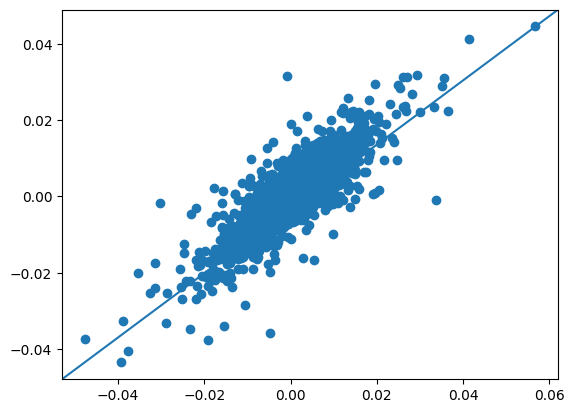

In [52]:
fig, ax = plt.subplots()
ax.scatter(x=res1_arr, y=gc1_arr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes)

(array([2.647e+03, 1.910e+02, 9.300e+01, 4.100e+01, 2.500e+01, 2.100e+01,
        1.400e+01, 6.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 4.000e+00, 9.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([4.05736630e-12, 2.41016200e-05, 4.82032360e-05, 7.23048519e-05,
        9.64064679e-05, 1.20508084e-04, 1.44609700e-04, 1.68711316e-04,
        1.92812932e-04, 2.16914548e-04, 2.41016164e-04, 2.65117780e-04,
        2.89219396e-04, 3.13321011e-04, 3.37422627e-04, 3.61524243e-04,
        3.85625859e-04, 4.09727475e-04, 4.33829091e-04, 4.57930707e-04,
        4.820323

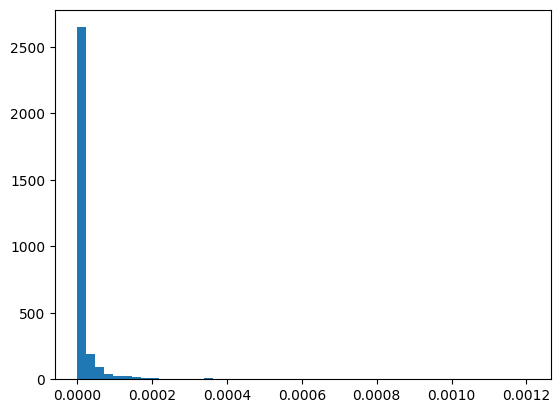

In [53]:
mse_dist = (res1_arr - gc1_arr) ** 2
plt.hist(mse_dist, bins=50)

In [55]:
# testing for maturity 2 too 
gc2_df = pd.read_csv("Data/COMEX_DL_GC2!, 1D.csv", parse_dates=['time'], index_col='time').tz_localize("UTC")

res2 = generic_roll(detailed_df, 2)
res2.index = res2.index.tz_localize('UTC')

common2_idx = set(res2.index).intersection(set(gc2_df.index))
print(len(common2_idx))

res2_pct = res2['close'].pct_change()
gc2_pct = gc2_df['close'].pct_change()

# Find common indices and remove NaN values
common_idx = common_idx.intersection(res2_pct.index[res2_pct.notna()])
common_idx = common_idx.intersection(gc2_pct.index[gc2_pct.notna()])

res2_arr = np.array(res2_pct.loc[common_idx])
gc2_arr = np.array(gc2_pct.loc[common_idx])
mse2 = np.mean((res2_arr - gc2_arr) ** 2)
print(mse2)

3081
1.532549973731171e-05


Conclusion: continous contracts created from function is similar enough to the ones created from TradingView